# MAC-LRN Case Study
   ## Members:
   ### Caguiat, EJ
   ### Caro, Patricia
   ### Dienzo, Jericho Rafael
 
## Dataset: "Titanic: Machine Learning from Disaster"

 
 
 
 


# Introduction of the problem and dataset
### The training dataset that we are currently using describes different features for each passenger aboard the Titanic and shows whether or not they survived. The task is to correctly classify whether or not a given person with a given set of features (from the test dataset) would survive based on the training dataset.
#### The link to the kaggle dataset that we used: https://www.kaggle.com/c/titanic

# List of requirements
### The list of requirements that we used, and what we think are necessary in order to tackle this problem, are:
#### - Pandas (A Python library built on NumPy which is commonly used for machine learning problems)
#### - NumPy (A Python library used to process numerical data)
#### - The Kaggle Dataset (specifically the Titanic dataset) which can be obtained from the link provided above
#### - Matplotlib (A Python library used for plotting)
#### - Seaborn (A Python for data visualization)

### Import of necessary libraries and data sets

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd
trainfile = pd.read_csv("train.csv")
testfile = pd.read_csv("test.csv")

# Data analysis
### The dataset that we used had many different features per person, all of which we deemed necessary in determining whether or not the person would live, except for the Passenger ID, ticket field and cabin(more on this later). There were many anomalies in the dataset, such as null fields, fields that contained different datatypes than intended (int fields having chars), etc. Thus the data cleaning.

#### The data in the training dataset
#### We can see in the given dataset that the Passenger ID is simply a unique identifier and would not be needed in determining whether or not a person survives
#### The Ticket is also given, although it is very hard to attribute it to any part of a person's survivability. The number given is also vague, thus a correlation between the Train column and the other columns could not be established.

In [153]:
print(trainfile)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

#### Graph showing the amount of people that did or did not survive

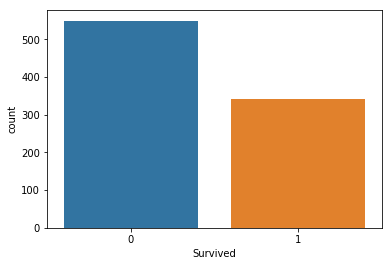

In [154]:
sns.countplot(x='Survived', data=trainfile);

# Data Cleaning
### The removal of PassengerId was done because it had no bearing on whether or not the person would survive. 
### The removal of the Ticket field was also done for the same reasons as the PassengerId. It is also hard to identify exactly what the Ticket field is specifying (if anything at all).
### The cabin field might appear as important in determining whether or not a person lives as the other features/factors (after all, the people residing in nearest cabins to the top of the ship have a better chance of surviving), but upon closer inspection, one would come to realize that the Ticket field is nothing but an unnecessary field presenting redundant information. It presents the same data as the Fare and PClass, in that you can already derive a person's status from the Fare and PClass. We can then infer exactly what the person's social status is and, as a result, be able to infer where they are staying on the ship. 

In [155]:
columnsdropped = ['PassengerId', 'Ticket', 'Cabin']
ports = ['S', 'C', 'Q']
trainfile.drop(columnsdropped, inplace = True, axis = 1)
testfile.drop(columnsdropped, inplace = True, axis = 1)

for x in range(0, trainfile['Age'].size - 1):
    if pd.isnull(trainfile.Age.iloc[x]):
        trainfile.at[x, 'Age'] = np.random.uniform(low = trainfile.Age.min(), high = trainfile.Age.max())

for x in range(0, testfile['Age'].size - 1):
    if pd.isnull(testfile.Age.iloc[x]):
        testfile.at[x, 'Age'] = np.random.uniform(low = testfile.Age.min(), high = testfile.Age.max())
        
for x in range(0, trainfile['Embarked'].size - 1):
    if pd.isnull(trainfile.Embarked.iloc[x]):
        trainfile.at[x, 'Embarked'] = rnd.choice(ports)

In [156]:
#reference https://www.kaggle.com/gaurav9297/titanic-using-knn

#feature selection (select relevant columns from data)
label=trainfile.iloc[0:890,0]
data=trainfile.iloc[0:890,[1,3,4,5,6,7,8]]
testdat=testfile.iloc[0:418,[0,2,3,4,5,6,7]]
x=[data,testdat]

#normalization of 'sex' column
for change in x:
    change['Sex']=change['Sex'].map({'female':0,'male':1}).astype(int)
    
#normalization of 'Embarked' column
for change in x:
    change['Embarked'] = change['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

#part of preprocessing
data=(data.fillna(0)) #filling NA values
testdat=testdat.fillna(0)

In [157]:
#combining and splitting data to remove 'bias'
from sklearn.model_selection import train_test_split

train_data,test_data,train_labels,test_labels=train_test_split(data,label,random_state=7,train_size=0.7, test_size=0.3)

# Algorithms used

### FIRST ALGORITHM: KNN

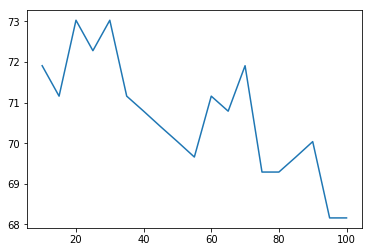

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
[71.909999999999997, 71.159999999999997, 73.030000000000001, 72.280000000000001, 73.030000000000001, 71.159999999999997, 70.790000000000006, 70.409999999999997, 70.040000000000006, 69.659999999999997, 71.159999999999997, 70.790000000000006, 71.909999999999997, 69.290000000000006, 69.290000000000006, 69.659999999999997, 70.040000000000006, 68.159999999999997, 68.159999999999997]


In [158]:
#start KNN
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

neigh = []
xs = []
for x in range(10,105,5):

    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(data,label)
    
    predictions=knn.predict(test_data)
    #print(predictions)
    
    #accuracy percentage
    neigh.append(round(accuracy_score(test_labels,predictions)*100,2))
    xs.append(x)
    
plt.plot(xs, neigh)
plt.show()

print(xs)
print(neigh)
    #what you can do here is LOOP yung whole KNN code (peds mo naman ilagay into one cell lahat) 
    #so you loop and increment mo yung 'n_neighbors' paremeter ng KNeighborsClassifier
    #then you store the different accuracies per iteration in an array to check how many neighbors is best to use
    #tas i-graph mo using matplotlib
    #add it nalang sa next cell

### SECOND ALGORITHM: PERCEPTRON

/Users/Jericho/Documents/Subjects/MAC-LRN/Projects/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


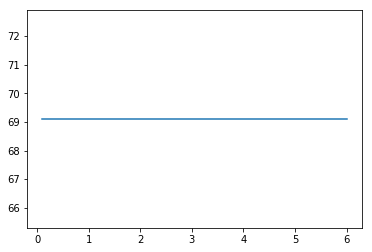

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 3.800000000000002, 3.900000000000002, 4.000000000000002, 4.100000000000001, 4.200000000000001, 4.300000000000001, 4.4, 4.5, 4.6, 4.699999999999999, 4.799999999999999, 4.899999999999999, 4.999999999999998, 5.099999999999998, 5.1999999999999975, 5.299999999999997, 5.399999999999997, 5.4999999999999964, 5.599999999999996, 5.699999999999996, 5.799999999999995, 5.899999999999995, 5.99999

In [159]:
#import necessary libraries
from sklearn.linear_model import Perceptron

pLR = []
pAcc = []

def frange(start, stop, step):
    x = start
    while x < stop:
        yield x
        x += step

for i in frange(0.1,6,0.1):
    perceptron = Perceptron(eta0=i) #changing LR
    perceptron.fit(data,label)
    Y_pred = perceptron.predict(test_data)
    acc_perceptron = round(perceptron.score(data,label) * 100, 2)
    
    pLR.append(i)
    pAcc.append(acc_perceptron)
    
plt.plot(pLR, pAcc)
plt.show()

print(pLR)
print(pAcc)

### THIRD ALGORITHM: SUPPORT VECTOR MACHINES

In [160]:
#import files
from sklearn.svm import SVC

svc = SVC()
svc.fit(data,label)
Y_pred = svc.predict(test_data)
acc_svc = round(svc.score(data,label) * 100, 2)
    
print(acc_svc)
    

89.66
